# Human activity recognition

# Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[15,5]

# Load the data

In [2]:
data = open('train.txt','r')

# Data pre-processing

Raw accelerometer sensor data is collected from the smartphone and smartwatch at a rate of
20Hz. It is collected from 29 test subjects as they perform 6 activities (walking, jogging,
ascending stairs, descending stairs, sitting, and standing) over a span of time.

In [3]:
col_Names=["User", "Activity", "Timestamp", "X_accleration",'Y_accleration','Z_accleration']

df = pd.read_csv(data,names = col_Names)
df.head()

,User,Activity,Timestamp,X_accleration,Y_accleration,Z_accleration
0,33,Upstairs,49591302292000,0.381370,13.865514,1.2258313;
1,33,Upstairs,49591412308000,-2.111154,10.147159,0.88532263;
2,33,Upstairs,49591522323000,0.381370,5.366417,0.6537767;
3,33,Upstairs,49591632309000,1.184970,4.018003,3.5957718;
4,33,Upstairs,49591742294000,1.334794,17.011814,4.0588636;


Semicolon(;) must be removed from 'Z-accleration' column

In [4]:
df['Z_accleration'] = df['Z_accleration'].astype('str')

In [5]:
df['Z_accleration']=df.Z_accleration.str.split(';').map(lambda x:x[0])

In [6]:
df.head()

,User,Activity,Timestamp,X_accleration,Y_accleration,Z_accleration
0,33,Upstairs,49591302292000,0.381370,13.865514,1.2258313
1,33,Upstairs,49591412308000,-2.111154,10.147159,0.88532263
2,33,Upstairs,49591522323000,0.381370,5.366417,0.6537767
3,33,Upstairs,49591632309000,1.184970,4.018003,3.5957718
4,33,Upstairs,49591742294000,1.334794,17.011814,4.0588636


# Exploratory Data Analysis 

Walking:0,
Jogging:1,
Upstairs:2, 
Downstairs:3, 
Sitting:4, 
Standing:5

In [7]:
train_test_data = [df]
df['Activity'].value_counts()

Walking       424396
Jogging       342050
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: Activity, dtype: int64

In [8]:
title_mapping = {"Walking": 0, "Jogging": 1, "Upstairs": 2, 
                 "Downstairs": 3, "Sitting": 4, "Standing": 5 }
for dataset in train_test_data:
    dataset['Target'] = dataset['Activity'].map(title_mapping)

In [9]:
df.head()

,User,Activity,Timestamp,X_accleration,Y_accleration,Z_accleration,Target
0,33,Upstairs,49591302292000,0.381370,13.865514,1.2258313,2
1,33,Upstairs,49591412308000,-2.111154,10.147159,0.88532263,2
2,33,Upstairs,49591522323000,0.381370,5.366417,0.6537767,2
3,33,Upstairs,49591632309000,1.184970,4.018003,3.5957718,2
4,33,Upstairs,49591742294000,1.334794,17.011814,4.0588636,2


Droping the Activity column since it is no longer required

In [10]:
new_df = df.copy()

In [11]:
new_df.drop('Activity', axis=1,inplace=True)

In [12]:
new_df.head()


,User,Timestamp,X_accleration,Y_accleration,Z_accleration,Target
0,33,49591302292000,0.381370,13.865514,1.2258313,2
1,33,49591412308000,-2.111154,10.147159,0.88532263,2
2,33,49591522323000,0.381370,5.366417,0.6537767,2
3,33,49591632309000,1.184970,4.018003,3.5957718,2
4,33,49591742294000,1.334794,17.011814,4.0588636,2


# Data Visualizations

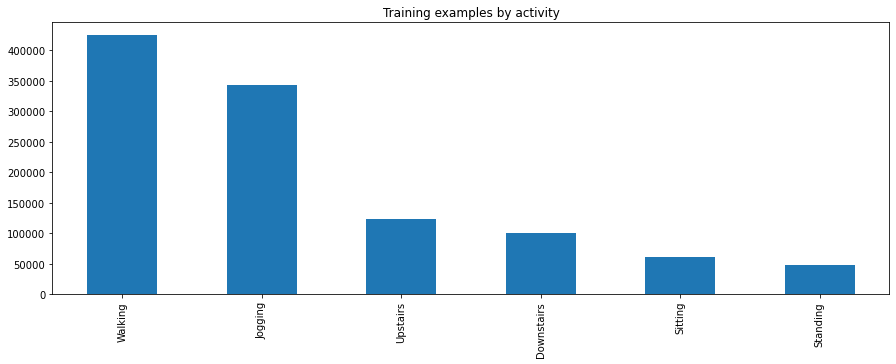

In [13]:
df['Activity'].value_counts().plot(kind='bar', title='Training examples by activity');

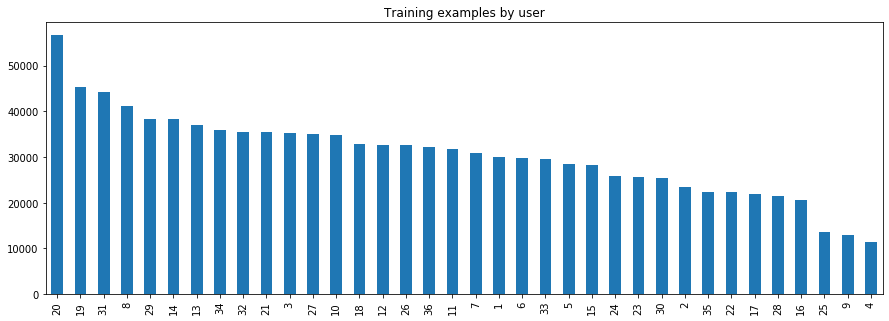

In [364]:
df['User'].value_counts().plot(kind='bar',title='Training examples by user');

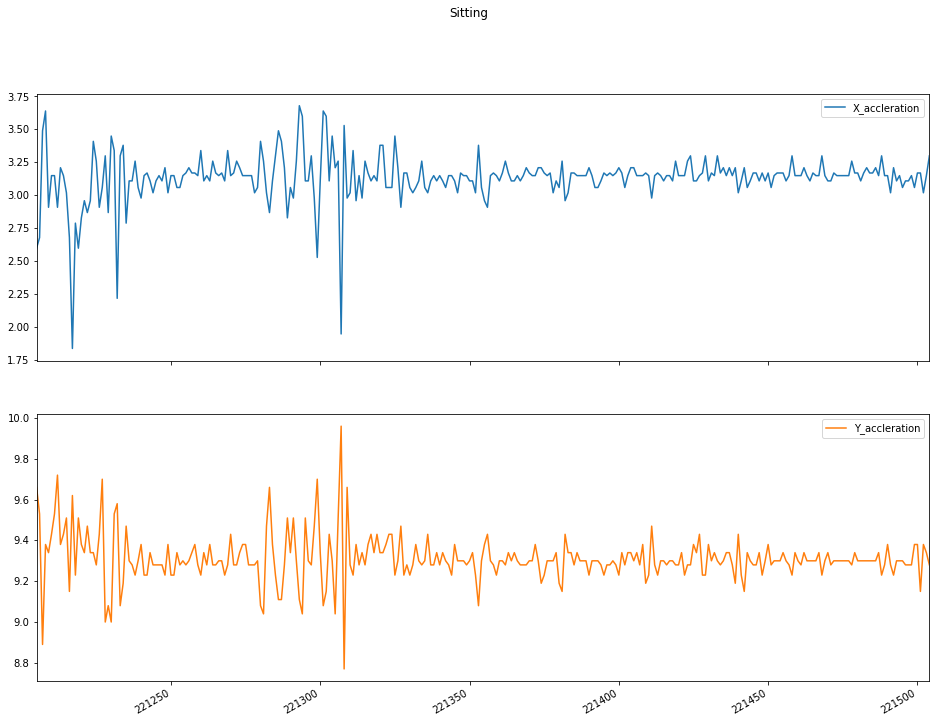

In [385]:
def plot_activity(activity, df):
    data = df[df['Activity'] == activity][['X_accleration', 'Y_accleration','Z_accleration']][:300]
    axis = data.plot(subplots=True, figsize=(16, 12), title=activity)
plot_activity("Sitting", df)

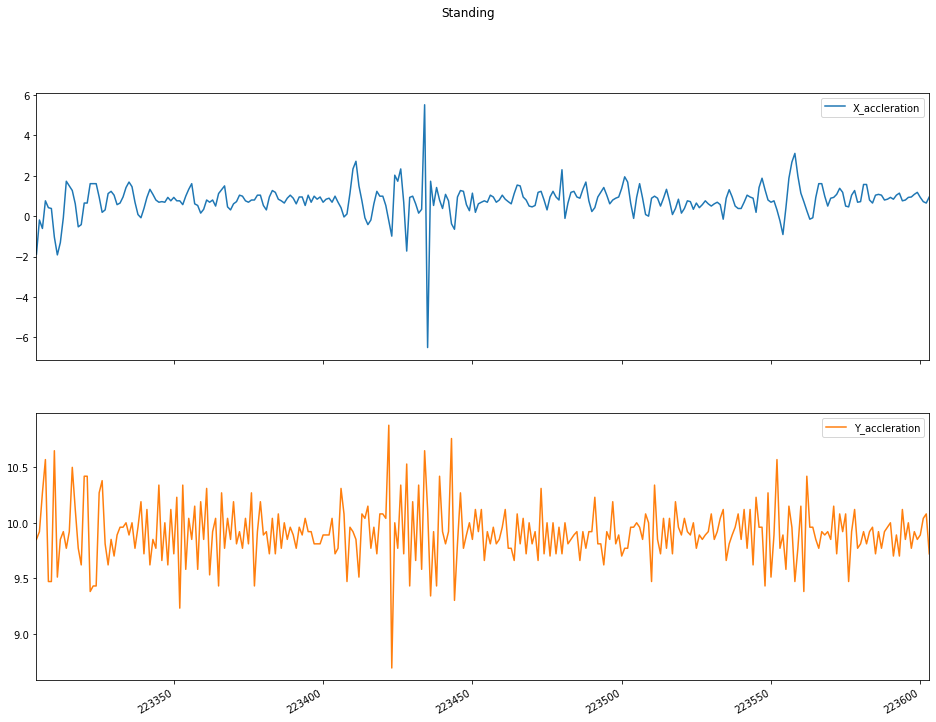

In [379]:
plot_activity("Standing", df)

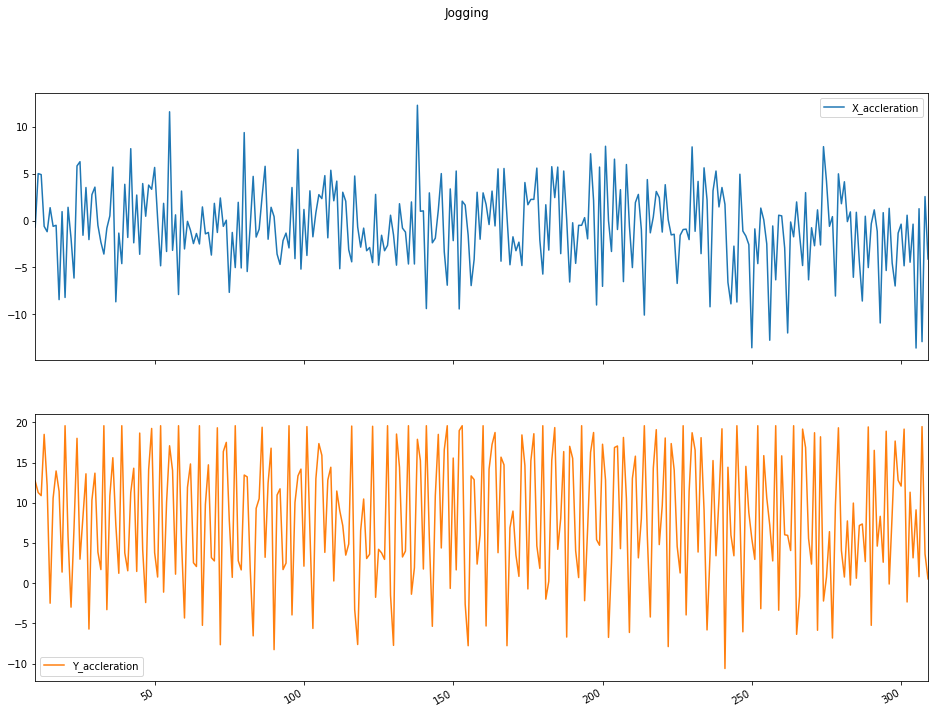

In [386]:
plot_activity("Jogging", df)

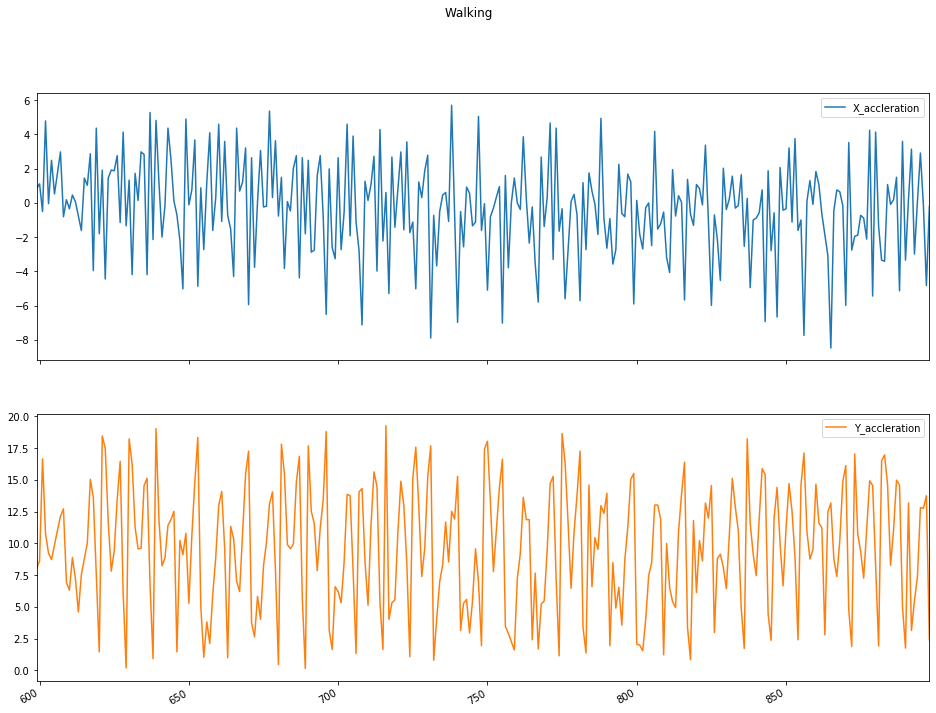

In [387]:
plot_activity("Walking", df)

# Problem Identification & Model

Our model should identify the activity of the user

# Feature Normalization

In [397]:
float_array = df[["User", "Timestamp", "X_accleration",'Y_accleration','Z_accleration']].values.astype(float)
col_Names=["User", "Timestamp", "X_accleration",'Y_accleration','Z_accleration']

In [398]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array)
df_normalized.columns = col_Names
df_normalized.shape

(1098076, 5)

In [399]:
df_normalized.isnull().sum()

User             0
Timestamp        0
X_accleration    0
Y_accleration    0
Z_accleration    1
dtype: int64

In [400]:
df_normalized['Target'] = new_df['Target'].values
df_normalized = df_normalized.dropna()
df_normalized.shape

(1098075, 6)

# Classification model using SVM

In [401]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

In [402]:
y = df_normalized.Target

Train Test split & test size is 20%

In [403]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.2)


Fitting training data

In [404]:
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Cross validation

In [407]:
clf.predict(X_test)

array([1, 1, 5, ..., 5, 0, 0])

In [408]:
clf.score(X_test, y_test)

1.0